In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load Dataset
df = pd.read_csv('/content/Bank_Clients.csv')

In [3]:
#Check the first few columns of the datasets
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
#Descriptive Statistics of the dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Drop irrelevant columns
data = df.drop(['CustomerId', 'Surname'], axis=1)

# Check for missing values
print(data.isnull().sum())


RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [9]:
# Label encode 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-hot encode 'Geography'
data = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Select numerical features to scale
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [11]:
# Separate features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


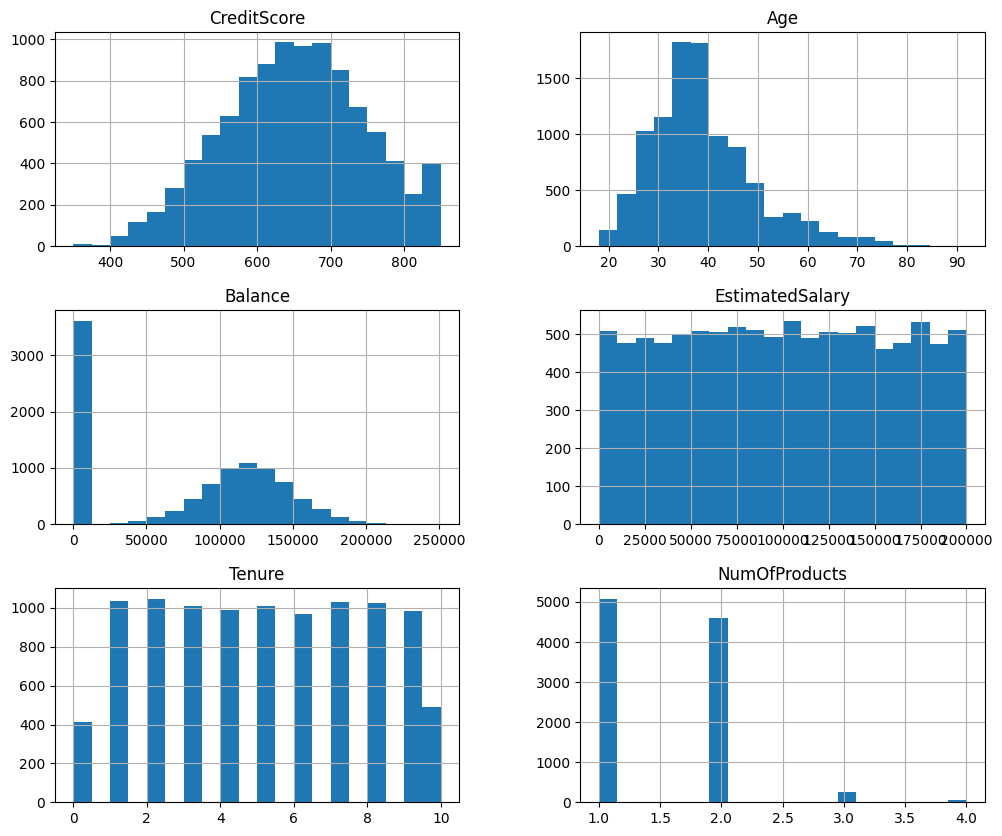

In [14]:
# Visualize the distribution of numerical features
X[numerical_features].hist(figsize=(12, 10), bins=20)
plt.show()


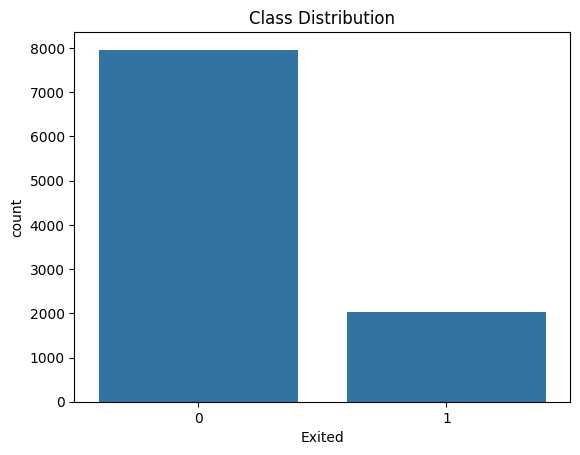

In [15]:
# Check class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()


In [10]:
# Initialize the neural network
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer (optional)
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [29]:
# Display data types of each column to identify non-numeric columns
print(X_train.dtypes)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


In [30]:
# One-hot encoding for 'Geography' if not already done
if 'Geography' in df.columns:
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [31]:
# Verify that all features are numeric
print(X_train.dtypes)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


In [32]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Drop 'Surname' from X_train and X_test
X_train = X_train.drop(['Surname'], axis=1)
X_test = X_test.drop(['Surname'], axis=1)


In [34]:
print(X_train.columns)


Index(['RowNumber', 'CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [35]:
# Drop 'RowNumber' and 'CustomerId' from X_train and X_test
X_train = X_train.drop(['RowNumber', 'CustomerId'], axis=1)
X_test = X_test.drop(['RowNumber', 'CustomerId'], axis=1)


In [36]:
print(X_train.shape)


(8000, 11)


In [37]:
# Check if the input dimension is correct in the model definition
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Use X_train.shape[1] to set input dimension dynamically


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
print(X_train.columns)
print(X_test.columns)


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')
Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')


In [39]:
# Align columns of X_train and X_test
X_train, X_test = X_train.align(X_test, axis=1, fill_value=0)


In [40]:
print(X_train.shape)
print(X_test.shape)


(8000, 11)
(2000, 11)


In [72]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])


In [40]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=2)


Epoch 1/100
200/200 - 2s - 11ms/step - accuracy: 0.7625 - auc_2: 0.6618 - loss: 0.5040 - val_accuracy: 0.8144 - val_auc_2: 0.7752 - val_loss: 0.4236
Epoch 2/100
200/200 - 1s - 3ms/step - accuracy: 0.8194 - auc_2: 0.7881 - loss: 0.4179 - val_accuracy: 0.8406 - val_auc_2: 0.8119 - val_loss: 0.3926
Epoch 3/100
200/200 - 1s - 3ms/step - accuracy: 0.8400 - auc_2: 0.8186 - loss: 0.3912 - val_accuracy: 0.8400 - val_auc_2: 0.8324 - val_loss: 0.3741
Epoch 4/100
200/200 - 1s - 6ms/step - accuracy: 0.8494 - auc_2: 0.8362 - loss: 0.3730 - val_accuracy: 0.8444 - val_auc_2: 0.8437 - val_loss: 0.3619
Epoch 5/100
200/200 - 1s - 5ms/step - accuracy: 0.8534 - auc_2: 0.8454 - loss: 0.3624 - val_accuracy: 0.8475 - val_auc_2: 0.8471 - val_loss: 0.3571
Epoch 6/100
200/200 - 1s - 3ms/step - accuracy: 0.8552 - auc_2: 0.8511 - loss: 0.3555 - val_accuracy: 0.8438 - val_auc_2: 0.8492 - val_loss: 0.3546
Epoch 7/100
200/200 - 0s - 2ms/step - accuracy: 0.8552 - auc_2: 0.8537 - loss: 0.3518 - val_accuracy: 0.8481 - 

In [74]:
# Evaluate the model on the test data
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Test AUC: {test_auc}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7019 - auc_4: 0.5844 - loss: 0.6051
Test Loss: 0.6033575534820557
Test Accuracy: 0.7095000147819519
Test AUC: 0.5831025838851929


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.27184466019417475
Recall: 0.28498727735368956
F1 Score: 0.2782608695652174
Confusion Matrix:
[[1307  300]
 [ 281  112]]


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


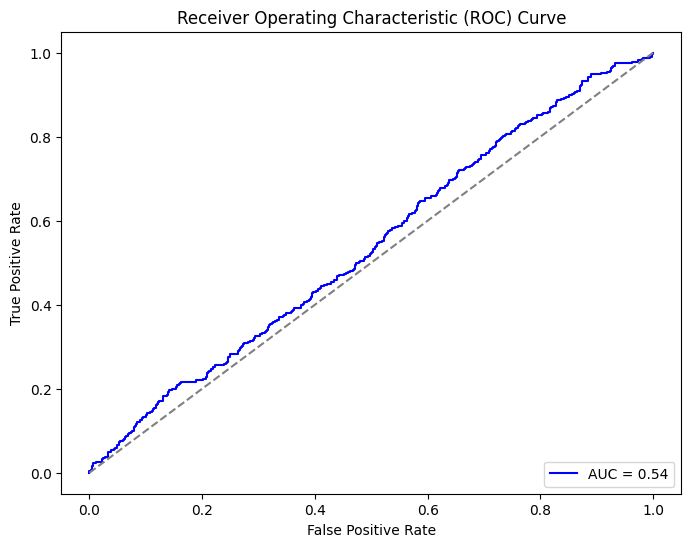

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for ROC curve
y_pred_proba = model.predict(X_test)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [46]:
#Building another model to improve the accuracy and model performance
#Import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np

In [47]:
# Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: weights[0], 1: weights[1]}

In [48]:
# Improved model architecture
model_improved = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile the model
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [51]:
# Check the unique values and type of `y_train`
print(y_train.unique())
print(type(y_train))


[0 1]
<class 'pandas.core.series.Series'>


In [52]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train


In [54]:
# Train the model
history_improved = model_improved.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, class_weight=class_weights_dict, callbacks=[early_stopping])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6308 - accuracy: 0.4881 - loss: 0.6673 - val_AUC: 0.8040 - val_accuracy: 0.7069 - val_loss: 0.5818
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7849 - accuracy: 0.6901 - loss: 0.5735 - val_AUC: 0.8297 - val_accuracy: 0.7400 - val_loss: 0.5240
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8107 - accuracy: 0.7224 - loss: 0.5312 - val_AUC: 0.8450 - val_accuracy: 0.7406 - val_loss: 0.5185
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8226 - accuracy: 0.7460 - loss: 0.5161 - val_AUC: 0.8476 - val_accuracy: 0.7525 - val_loss: 0.5005
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8354 - accuracy: 0.7414 - loss: 0.4987 - val_AUC: 0.8471 - val_accuracy: 0.7869 - val_loss: 0.4494
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8353 - accuracy: 0.7550 - loss: 0.5074 - val_AUC: 0.8494 - val_accuracy: 0.7800 - val_loss: 0.4594
Epoch 7/100
200/200 ━━━━━━━━━━━━━━

In [56]:
print("Shape of y_test:", y_test.shape)


Shape of y_test: (2000,)


In [57]:
# If `y_test` is a column vector, flatten it
if len(y_test.shape) > 1 and y_test.shape[1] == 1:
    y_test = y_test.ravel()


In [58]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values


In [59]:
test_loss, test_accuracy, test_auc = model_improved.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8567 - accuracy: 0.8001 - loss: 0.4358
Test Loss: 0.4422958195209503
Test Accuracy: 0.7990000247955322
Test AUC: 0.8530648350715637


In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.20512820512820512
Recall: 0.8956743002544529
F1 Score: 0.33380749170222856
Confusion Matrix:
[[ 243 1364]
 [  41  352]]


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


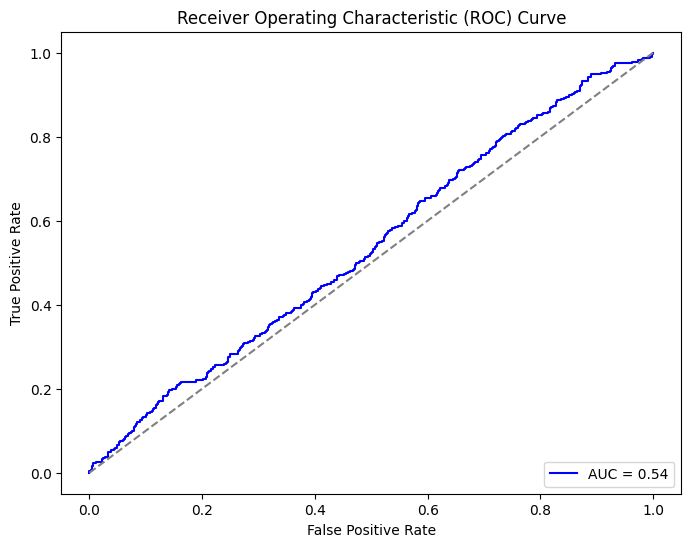

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for ROC curve
y_pred_proba = model.predict(X_test)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [62]:
#Another model with suggested improvements
#Importing the necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from keras.layers import Dropout
from keras.optimizers import Adam

In [63]:
#Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [64]:
# Build an improved neural network model
model_improved = Sequential([
    Dense(64, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Compile the model with Adam optimizer and a custom learning rate
model_improved.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy', tf.keras.metrics.AUC()])

In [66]:
# Train the model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_improved = model_improved.fit(X_train_balanced, y_train_balanced,
                                      validation_split=0.2,
                                      epochs=100,
                                      batch_size=32,
                                      callbacks=[early_stopping])

Epoch 1/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6410 - auc_3: 0.6753 - loss: 0.6177 - val_accuracy: 0.6520 - val_auc_3: 0.0000e+00 - val_loss: 0.6819
Epoch 2/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7681 - auc_3: 0.8278 - loss: 0.4922 - val_accuracy: 0.7287 - val_auc_3: 0.0000e+00 - val_loss: 0.5694
Epoch 3/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7831 - auc_3: 0.8494 - loss: 0.4631 - val_accuracy: 0.7527 - val_auc_3: 0.0000e+00 - val_loss: 0.5058
Epoch 4/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7882 - auc_3: 0.8551 - loss: 0.4548 - val_accuracy: 0.7122 - val_auc_3: 0.0000e+00 - val_loss: 0.5534
Epoch 5/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - auc_3: 0.8706 - loss: 0.4299 - val_accuracy: 0.7562 - val_auc_3: 0.0000e+00 - val_loss: 0.4758
Epoch 6/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - auc_3: 0.8693 - loss: 0.4330 - val_accuracy: 0.7295 - val_auc_3: 0.0000e+00 - val

In [67]:
# Evaluate the model
test_loss, test_accuracy, test_auc = model_improved.evaluate(X_test, y_test)
y_pred_probs = model_improved.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8190 - auc_3: 0.8473 - loss: 0.4079
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Loss: 0.40783125162124634
Test Accuracy: 0.8209999799728394
Test AUC: 0.847808837890625


In [68]:
# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.88      1607
           1       0.54      0.68      0.60       393

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000

Confusion Matrix:
[[1375  232]
 [ 126  267]]
